In [1]:
## ANN: Artificial Neural Network (인공 신경망)
%reset -f


가중치 벡터 w =  [[2. 2.]]
y-절편 =  [-1.]


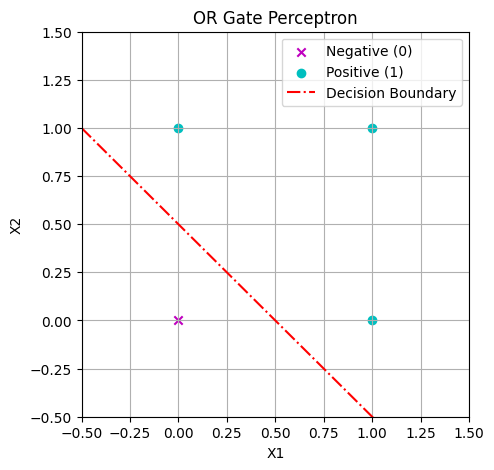

[0 1 1 1]


In [2]:
## 0) OR 게이트 학습하기
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Training Set 만들기
X = np.array([[0, 0], [0, 1], [1, 0],[1, 1]])
y = np.array([0, 1, 1, 1])
#y = np.array([0, 0, 0, 1])

# Perceptron Learning
clf = Perceptron()
clf.fit(X, y)

# 학습된 가중치 출력
print("가중치 벡터 w = ", clf.coef_)
print("y-절편 = ", clf.intercept_)

# Plotting Results
plt.figure(figsize=(5,5))

# Positive와 Negative 샘플 분리하여 플롯
plt.scatter(X[y==0, 0], X[y==0, 1], c='m', marker='x', label='Negative (0)')
plt.scatter(X[y==1, 0], X[y==1, 1], c='c', marker='o', label='Positive (1)')

# 경계 직선의 x 좌표와 y 좌표 계산
x_values = np.array([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5])
y_values = -(clf.coef_[0][0] * x_values + clf.intercept_[0]) / clf.coef_[0][1]

# 경계 직선 (선분) 그리기
plt.plot(x_values, y_values, 'r-.', label="Decision Boundary")

# 기타 그래프 설정
plt.xlim([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5])
plt.ylim([X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("OR Gate Perceptron")
plt.legend()
plt.show()

print(clf.predict(X))

가중치 벡터 w =  [[0. 0.]]
y-절편 =  [0.]


<ipython-input-3-75eb16d680e3>:30: RuntimeWarning: invalid value encountered in divide
  y_values = -(clf.coef_[0][0] * x_values + clf.intercept_[0]) / clf.coef_[0][1]


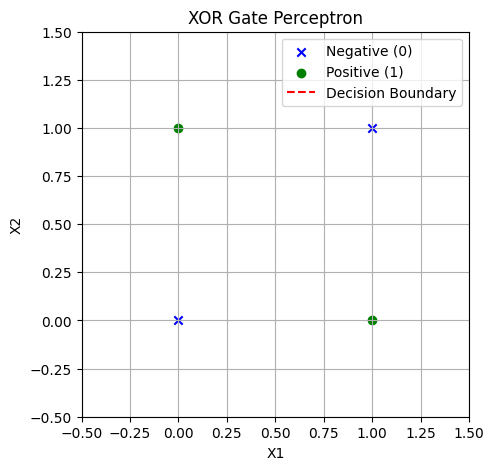

In [3]:
## 0-1) XOR 게이트 학습하기
  # 앞의 코드를 Ctrl + C, V 한 다음 y의 마지막 값만 0으로 바꾸자
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Training Set 만들기
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([ 0,    1,    1,    0])

# Perceptron Learning
clf = Perceptron()
clf.fit(X, y)

# 학습된 가중치 출력
print("가중치 벡터 w = ", clf.coef_)
print("y-절편 = ", clf.intercept_)

# Plotting Results
plt.figure(figsize=(5,5))

# Positive와 Negative 샘플 분리하여 플롯
plt.scatter(X[y==0, 0], X[y==0, 1], c='b', marker='x', label='Negative (0)')
plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='o', label='Positive (1)')

# 경계 직선의 x 좌표와 y 좌표 계산
x_values = np.array([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5])
y_values = -(clf.coef_[0][0] * x_values + clf.intercept_[0]) / clf.coef_[0][1]

# 경계 직선 그리기
plt.plot(x_values, y_values, 'r--', label="Decision Boundary")

# 기타 그래프 설정
plt.xlim([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5])
plt.ylim([X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
plt.grid(True)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Gate Perceptron")
plt.legend()
plt.show()


In [4]:
## 1) 필기체 분류 문제
%reset -f

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.metrics import confusion_matrix

# 데이터셋 로드
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.target.shape)

# 데이터셋을 Training Set과 Test Set으로 분할
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                              train_size=0.1, random_state=42)

# Perceptron Learning
  # 이번에는 초 매개변수를 몇 개만 설정해 보자
    # mat_iter = 최대 반복 학습 횟수
    # eta0 = 학습률
    # verbose = 학습 과정을 출력할지 여부 { 0, 1, 2 }
clf = Perceptron(max_iter=100, eta0=.001, verbose=0)
clf.fit(X_train, y_train)

# Test Set에 대한 예측 및 정확도 계산
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("정확도: ", accuracy)

# Confusion Matrix 출력
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 레이블 별 Recall 출력
print("\nRecall by Label:")
for i in range(10):
    tp = cm[i, i]
    fn = np.sum(cm[i, :]) - tp
    recall = tp / (tp + fn)
    print("Label {}: {}".format(i, recall))
# Recall의 가중평균 출력
wavg_recall = np.mean(np.diag(cm) / np.sum(cm, axis=1))
print("\nAverage Recall: {}".format(wavg_recall))

# 레이블 별 Precision 출력
print("\nPrecision by Label:")
for i in range(10):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    precision = tp / (tp + fp)
    print("Label {}: {}".format(i, precision))
# Precision의 가중평균 출력
wavg_precision = np.mean(np.diag(cm) / np.sum(cm, axis=0))
print("\nAverage Precision: {}".format(wavg_precision))

# 전체에 대한 F1 Score 출력
f1_score = 2 * (wavg_precision * wavg_recall) / (wavg_precision + wavg_recall)
print("\nF1 Score: {}".format(f1_score))


(1797, 64)
(1797,)
정확도:  0.8862793572311496

Confusion Matrix:
[[143   0   1   0   7   2   0   0   0   0]
 [  0 130  21   1   3   0   1   0   2   3]
 [  0   1 158   0   0   0   0   0   0   0]
 [  4   3   4 141   0   2   0   6   5   1]
 [  0   0   0   0 158   0   0   1   3   0]
 [  1   4   0   0   1 150   1   0   0   5]
 [  0   3   0   0   2   0 164   0   0   0]
 [  0   1   0   0   5   3   0 157   1   0]
 [  1   9  10   3   1  12   3  10 103   0]
 [  9   1   0   9   1   4   0   9   4 130]]

Recall by Label:
Label 0: 0.934640522875817
Label 1: 0.8074534161490683
Label 2: 0.9937106918238994
Label 3: 0.8493975903614458
Label 4: 0.9753086419753086
Label 5: 0.9259259259259259
Label 6: 0.9704142011834319
Label 7: 0.9401197604790419
Label 8: 0.6776315789473685
Label 9: 0.7784431137724551

Average Recall: 0.8853045443493762

Precision by Label:
Label 0: 0.9050632911392406
Label 1: 0.8552631578947368
Label 2: 0.8144329896907216
Label 3: 0.9155844155844156
Label 4: 0.8876404494382022
Label 5: 0.8

Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.75
Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.75
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5
Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.0
Learned Weights and Biases:
Layer 0 weights:
[[ 0.99523572  1.58646558]
 [-0.17177101 -1.58637777]]
Layer 0 biases:
[4.35568318e-01 6.61487002e-05]
Layer 1 weights:
[[-1.15846891]
 [ 1.84543987]]
Layer 1 biases:
[0.3602747]


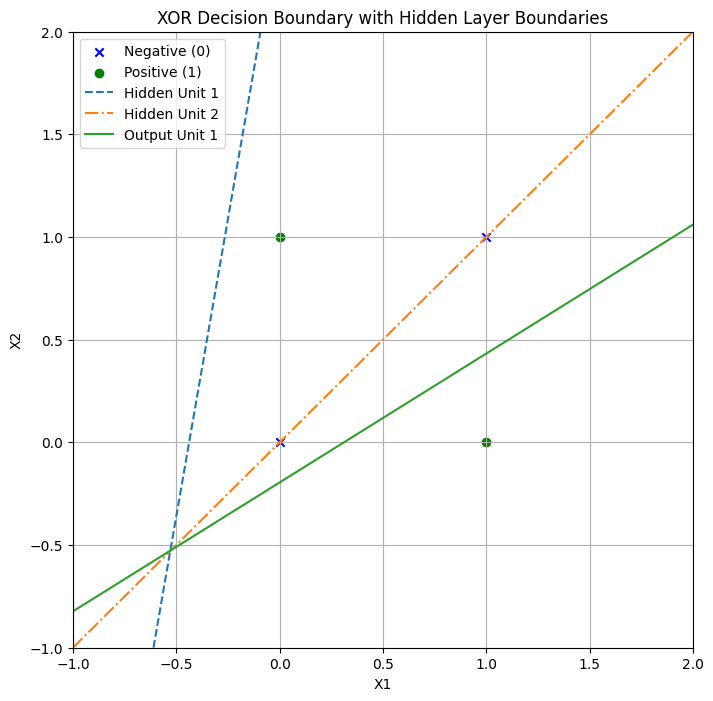

In [5]:
## 0-2) XOR 게이트 학습하기: MLP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR 데이터 생성
X = np.array([[0, 0], [0, 1],
              [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

acc = 0
while acc < 1:
  # Multi-Layer Perceptron Learning
  clf = MLPClassifier(hidden_layer_sizes=(2,),
                      max_iter=1000, alpha=1e-5,
                      solver='sgd', verbose=0)
  clf.fit(X, y)

  # 학습 결과 분석
  acc = clf.score(X, y)
  print("Accuracy:", acc)

# Plotting Results
plt.figure(figsize=(8, 8))
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid(True)

# Positive와 Negative 샘플 분리하여 플롯
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', marker='x', label='Negative (0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='Positive (1)')

# 학습된 가중치와 편향 가중치 출력
print("Learned Weights and Biases:")
for i, (layer_weights, layer_biases) in enumerate(zip(clf.coefs_, clf.intercepts_)):
    print(f"Layer {i} weights:")
    print(layer_weights)
    print(f"Layer {i} biases:")
    print(layer_biases)

# 은닉층 유닛 경계선 시각화
lineformat = ['--', '-.', ':']
for i, (weights, bias) in enumerate(zip(clf.coefs_[0].T, clf.intercepts_[0])):
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, linestyle=lineformat[i % 3], label=f'Hidden Unit {i+1}')

# 출력층 유닛 경계선 시각화
for i, (weights, bias) in enumerate(zip(clf.coefs_[1].T, clf.intercepts_[1])):
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, linestyle='-', label=f'Output Unit {i+1}')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Decision Boundary with Hidden Layer Boundaries")
plt.legend()
plt.show()


In [6]:
## 1-1) 필기체 분류 문제 : MLP
%reset -f

from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

# 데이터 로드
digits = datasets.load_digits()

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                test_size=0.5, random_state=42)

# Multi-Layer Perceptron Learning
clf = MLPClassifier(hidden_layer_sizes=(100,), learning_rate_init=.001,
                    batch_size=32, max_iter=300, solver='sgd', verbose=1)
clf.fit(X_train, y_train)

# 학습 결과 분석
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

# Confusion Matrix
print("\nConfusion Matrix: ")
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)


Iteration 1, loss = 2.05917628
Iteration 2, loss = 0.38997542
Iteration 3, loss = 0.23112537
Iteration 4, loss = 0.17471951
Iteration 5, loss = 0.14244074
Iteration 6, loss = 0.11607407
Iteration 7, loss = 0.11578072
Iteration 8, loss = 0.08928326
Iteration 9, loss = 0.08107918
Iteration 10, loss = 0.07049627
Iteration 11, loss = 0.06248283
Iteration 12, loss = 0.06057262
Iteration 13, loss = 0.05079361
Iteration 14, loss = 0.05847884
Iteration 15, loss = 0.04452953
Iteration 16, loss = 0.04199160
Iteration 17, loss = 0.03888585
Iteration 18, loss = 0.03448635
Iteration 19, loss = 0.03295901
Iteration 20, loss = 0.03056849
Iteration 21, loss = 0.02891406
Iteration 22, loss = 0.02997178
Iteration 23, loss = 0.02634420
Iteration 24, loss = 0.02560245
Iteration 25, loss = 0.02596239
Iteration 26, loss = 0.02582013
Iteration 27, loss = 0.02210663
Iteration 28, loss = 0.02154670
Iteration 29, loss = 0.02014746
Iteration 30, loss = 0.01945964
Iteration 31, loss = 0.02063649
Iteration 32, los

In [7]:
## 2) MNIST Dataset 분류 문제
%reset -f

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784', version=1)
data = mnist.data / 255.0

# 데이터셋 분리
X_train = data[:60000]
X_test = data[60000:]
y_train = mnist.target[:60000]
y_test = mnist.target[60000:]

# Multi-Layer Perceptron Learning
clf = MLPClassifier(hidden_layer_sizes=(200,), learning_rate_init=0.001,
                    batch_size=512, max_iter=30, solver='adam', verbose=1)
clf.fit(X_train, y_train)

# 학습 결과 분석
acc = clf.score(X_test, y_test)
print("Accuracy:", acc)

# Confusion Matrix
print("\nConfusion Matrix: ")
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.53413502
Iteration 2, loss = 0.23135241
Iteration 3, loss = 0.17307140
Iteration 4, loss = 0.13782968
Iteration 5, loss = 0.11344282
Iteration 6, loss = 0.09617494
Iteration 7, loss = 0.08322743
Iteration 8, loss = 0.07188276
Iteration 9, loss = 0.06335444
Iteration 10, loss = 0.05647175
Iteration 11, loss = 0.05038937
Iteration 12, loss = 0.04542645
Iteration 13, loss = 0.03979019
Iteration 14, loss = 0.03659759
Iteration 15, loss = 0.03179049
Iteration 16, loss = 0.02924573
Iteration 17, loss = 0.02672172
Iteration 18, loss = 0.02357788
Iteration 19, loss = 0.02139060
Iteration 20, loss = 0.01938616
Iteration 21, loss = 0.01761357
Iteration 22, loss = 0.01598001
Iteration 23, loss = 0.01382221
Iteration 24, loss = 0.01291769
Iteration 25, loss = 0.01207149
Iteration 26, loss = 0.01039234
Iteration 27, loss = 0.00931533
Iteration 28, loss = 0.00842408
Iteration 29, loss = 0.00817589
Iteration 30, loss = 0.00708005


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9799

Confusion Matrix: 
[[ 968    1    2    0    2    1    3    1    1    1]
 [   0 1123    3    2    0    1    2    1    3    0]
 [   4    1 1006    4    1    0    2    5    8    1]
 [   0    0    2  993    0    2    1    4    0    8]
 [   0    0    4    1  967    0    3    0    0    7]
 [   1    1    0   10    1  869    3    2    3    2]
 [   3    2    2    1    4    1  945    0    0    0]
 [   1    4    8    3    1    0    0 1007    2    2]
 [   5    0    2   11    4    2    3    3  941    3]
 [   2    3    0    3   12    1    0    5    3  980]]


In [8]:
## 3) Optimizaing Hyper-Parameters
# %reset -f

from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import numpy as np
import time

# Digits 데이터셋 가져오기
digits = datasets.load_digits()

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                test_size=0.4, random_state=42)

# MLP의 교차 검증 수행: 수행시간 측정하기
tic = time.time()
clf = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd')
param_range = range(50, 1001, 50)
train_scores, test_scores = validation_curve(clf, X_train, y_train,
                      param_name='hidden_layer_sizes', param_range=param_range, cv=10,
                      scoring='accuracy', n_jobs=4, verbose=10)
toc = time.time()
print("최적화에 걸린 시간 (Validation Time):", toc - tic)

# 최적의 은닉층 노드 수 출력하기
best_hidden_nodes = param_range[np.argmax(test_scores_mean)]
print("최적의 은닉층 노드 수:", best_hidden_nodes)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of 200 | elapsed:   44.0s remaining: 11.5min
[Parallel(n_jobs=4)]: Done  33 out of 200 | elapsed:  2.1min remaining: 10.9min
[Parallel(n_jobs=4)]: Done  54 out of 200 | elapsed:  3.4min remaining:  9.1min
[Parallel(n_jobs=4)]: Done  75 out of 200 | elapsed:  4.7min remaining:  7.9min
[Parallel(n_jobs=4)]: Done  96 out of 200 | elapsed:  6.2min remaining:  6.7min
[Parallel(n_jobs=4)]: Done 117 out of 200 | elapsed:  7.7min remaining:  5.5min
[Parallel(n_jobs=4)]: Done 138 out of 200 | elapsed:  9.0min remaining:  4.1min
[Parallel(n_jobs=4)]: Done 159 out of 200 | elapsed: 10.4min remaining:  2.7min
[Parallel(n_jobs=4)]: Done 180 out of 200 | elapsed: 11.8min remaining:  1.3min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 13.1min finished


최적화에 걸린 시간 (Validation Time): 786.2111818790436


NameError: name 'test_scores_mean' is not defined

In [ ]:
##  3-1) 결과 분석하기

# 교차검증 결과에 대한 통계량 계산하기
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 성능 그래프 그리기
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="b")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="b")
plt.legend(loc="best")
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy")
plt.ylim([0.9, 1.01])
plt.grid(axis="both")
plt.show()


In [ ]:
## 3-2) Learning with Optimum Hyper-Parameters
  # 3)에서 계속

# 최적 은닉층 크기로 모델 학습하기
mlp_opmized = MLPClassifier(hidden_layer_sizes=(best_hidden_nodes,), solver='sgd',
                            learning_rate_init=0.001, batch_size=32, max_iter=300)
mlp_opmized.fit(X_train, y_train)

# 테스트 집합으로 성능 측정
acc = mlp_opmized.score(X_test, y_test)
print("Accuracy (Optimized):", acc)

# Confusion Matrix
print("\nConfusion Matrix: ")
cm = confusion_matrix(y_test, mlp_opmized.predict(X_test))
print(cm)

